In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as numpy
import matplotlib.pyplot as plot
import matplotlib

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [5]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

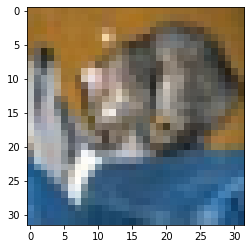

In [9]:
plot.imshow(x_test[0])

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = [32,32,3], padding='same'))

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding='same'))

model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 256, activation = 'relu'))

model.add(keras.layers.Dense(units=10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10,verbose=1, validation_data=(x_test,y_test))